In [61]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import datetime

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning and Understanding

In [62]:
# read the input file and check the shape
df = pd.read_csv('train.csv')
print(df.shape)

(1460, 81)


In [63]:
# get a look into the data
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [69]:
# check some stats about the data
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [70]:
# drop the ID column
df.drop('Id', axis = 1, inplace = True)
df.shape

KeyError: "['Id'] not found in axis"

In [71]:
#percentage of null values (non zero) in differend columns
round(df.isna().sum() / len(df.index) * 100 ,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64

In [72]:
# As columns like 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' have very high number of nan values we are going to remove these columns.
df_dropped = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print(df.shape)
print(df_dropped.shape)

(1460, 80)
(1460, 76)


In [12]:
#identify numerical and non-numerical columns automatically
NonNumCols = []
NumCols = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclo

In [13]:
# Let's view the unique value for each column
value_counts = []
for col in NonNumCols:
    value_counts.append(len(df_dropped[col].value_counts()))
data_val = {'cat_col': NonNumCols, 'value_counts': value_counts}
pd.DataFrame(data_val)

,cat_col,value_counts
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [14]:
# Replacing 'No Garage' to NAN
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_dropped[col].fillna('No Garage', inplace=True)
df_dropped['GarageYrBlt'].fillna(0, inplace=True)

In [15]:
# Replacing 'No Basement' to NAN
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_dropped[col].fillna('No Basement', inplace=True)

In [16]:
#rechecking percentage of null values (non zero) in differend columns
round(df.isna().sum() / len(df.index) * 100 ,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64

In [17]:
# Unique values in 'FireplaceQu'
df_dropped['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
# Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'
df_dropped['FireplaceQu'].fillna('No Fireplace', inplace=True)

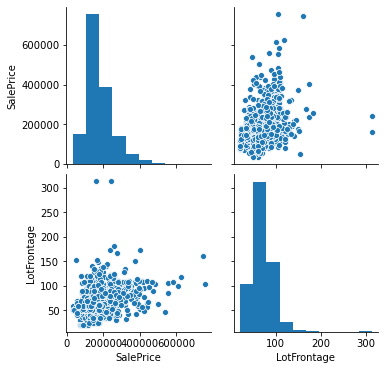

In [16]:
#Let's see how important the 'LotFrontage' column is
sns.pairplot(df_dropped[['SalePrice','LotFrontage']])

In [19]:
#Looks like 'LotFrontage' is an important column. Replace missing values of LotFrontage with Median
df_dropped.loc[:,'LotFrontage'] = df_dropped.loc[:, 'LotFrontage'].fillna(df_dropped['LotFrontage'].median())

In [20]:
df_dropped.dropna(inplace = True)

In [21]:
df_dropped.isnull().sum() #there is no null value anymore

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

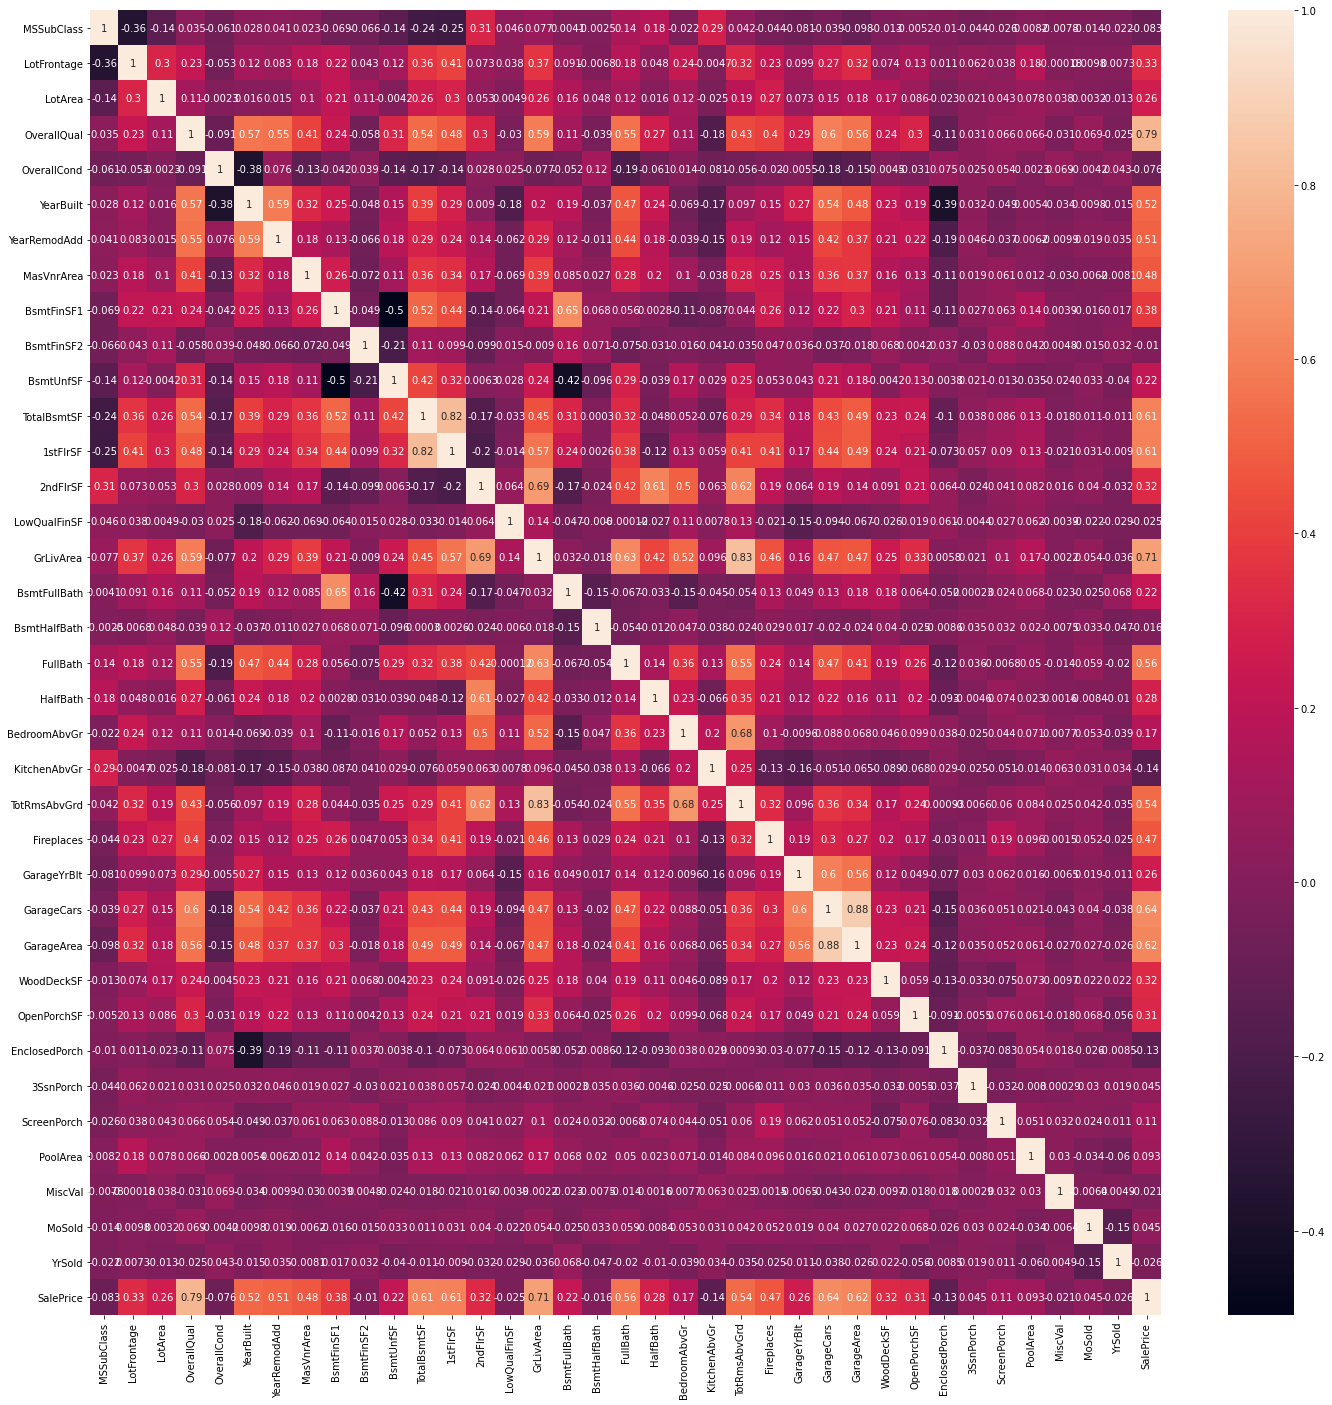

In [22]:
plt.figure(figsize=(24, 24))
sns.heatmap(df_dropped.corr(), annot = True)

In [23]:
#Identifying highly correlated varaibles
corr_matrix = df_dropped.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [24]:
#So, let's drop these three columns
df_dropped.drop(df[col_to_drop], axis=1, inplace = True)
df_dropped.shape

(1451, 73)

In [ ]:
sns.pairplot(df_dropped[list(df_dropped)])

## Derived Feature

In [25]:
#Getting the age of the houses
df_dropped['CurrentYear'] = datetime.datetime.now().year
df_dropped["Age"] = df_dropped['CurrentYear'] - df_dropped['YearBuilt']
df_dropped.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

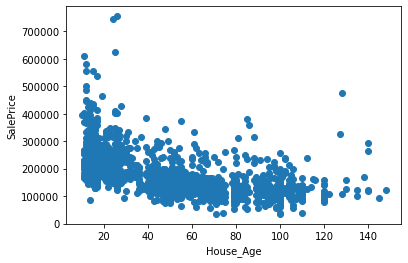

In [26]:
plt.scatter(x=df_dropped['Age'], y=df_dropped['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");


In [27]:
## Regenrating list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(df_dropped):
    if df_dropped[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

In [28]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(df_dropped[NonNumCols], drop_first=True)

In [29]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.shape

(1451, 283)

In [30]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1451, 244)

## Splitting Test-Train Data

In [31]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1015, 243)
X_test Shape: (436, 243)
y_train Shape: (1015,)
y_test Shape: (436,)


In [33]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,30,40.0,4800,4,7,1990,0.0,197,0,999,...,0,0,0,0,1,0,0,0,1,0
569,90,69.0,7032,5,5,1979,0.0,943,0,0,...,0,0,0,0,1,0,0,0,1,0
1181,120,64.0,5587,8,5,2008,186.0,1480,0,120,...,0,0,1,0,0,0,0,0,0,1


In [34]:
y_train.head(3)

801     109900
569     135960
1181    392500
Name: SalePrice, dtype: int64

## Scaling

In [35]:
scaler = StandardScaler()

In [37]:
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-1.298599,-0.513865,-1.552452,1.293141,0.238209,-0.562965,-0.502945,-0.297804,0.936307,...,0,0,0,0,1,0,0,0,1,0
569,0.788676,-0.041883,-0.315476,-0.824292,-0.538734,-0.301373,-0.562965,1.097605,-0.297804,-1.320626,...,0,0,0,0,1,0,0,0,1,0
1181,1.508340,-0.258558,-0.443913,1.360189,-0.538734,1.121161,0.447197,2.249743,-0.297804,-1.049523,...,0,0,1,0,0,0,0,0,0,1
808,0.548788,0.651477,0.250537,-0.824292,-0.538734,-0.939061,5.123271,0.181472,0.484095,-0.462133,...,0,0,0,0,1,0,0,0,1,0
1095,-0.890540,0.348132,-0.112376,-0.096131,-0.538734,1.023055,-0.562965,-0.874119,-0.297804,1.593732,...,0,0,0,0,1,0,0,0,1,0


In [38]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,120.0,44.0,4224.0,5.0,5.0,1976.0,1.400084e-17,8.740000e+02,4.725284e-17,268.0,...,0,0,0,0,1,0,0,0,1,0
824,20.0,81.0,11216.0,8.0,5.0,2006.0,1.400084e-17,-1.050063e-17,4.725284e-17,1489.0,...,0,0,1,0,0,0,0,0,0,1
369,20.0,69.0,9830.0,5.0,7.0,2006.0,1.400084e-17,7.200000e+01,2.580000e+02,733.0,...,0,0,0,0,1,0,0,0,1,0
291,190.0,55.0,5687.0,5.0,6.0,2000.0,1.400084e-17,2.100000e+02,4.725284e-17,570.0,...,0,0,0,0,1,0,0,0,1,0
134,20.0,78.0,10335.0,5.0,6.0,1993.0,1.400084e-17,5.700000e+02,4.725284e-17,891.0,...,0,0,0,0,1,0,0,0,1,0


## Model Building and Evaluation

### Ride Regression

In [39]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011903,0.003041,0.003481,0.000600,0.0001,{'alpha': 0.0001},-24415.859548,-15931.479124,-22068.883611,-21589.204356,...,-21020.172649,2787.642292,27,-11375.193348,-12723.496575,-12172.502944,-12370.827997,-11296.955743,-11987.795321,561.182283
1,0.010272,0.000406,0.003202,0.000395,0.001,{'alpha': 0.001},-24408.933347,-15897.439498,-21994.079154,-21500.267599,...,-20972.710187,2789.108653,26,-11375.316327,-12718.075282,-12165.229425,-12373.266692,-11295.083940,-11985.394333,560.059035
2,0.010457,0.000781,0.003274,0.000394,0.01,{'alpha': 0.01},-24350.604854,-15825.386856,-21422.235154,-20798.892351,...,-20657.087498,2743.954401,24,-11377.841931,-12760.465559,-12171.045450,-12475.728588,-11370.031030,-12031.022511,567.980931
3,0.010319,0.000368,0.003201,0.000415,0.05,{'alpha': 0.05},-24177.321290,-16962.802364,-20268.077001,-20397.376670,...,-20532.946601,2290.080532,20,-11410.130164,-13502.309039,-12729.902238,-13184.004165,-12144.862235,-12594.241568,747.645888
4,0.010204,0.000386,0.002994,0.000003,0.1,{'alpha': 0.1},-24021.131609,-17663.438506,-19837.455310,-20452.491290,...,-20608.847402,2056.745677,22,-11443.565034,-14114.644121,-13313.418123,-13750.445949,-12820.369325,-13088.488510,929.455481


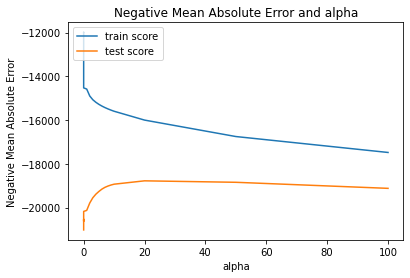

In [41]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [42]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ -5825.86465068,  -2993.36303312,   4789.95146384,  16290.25049071,
         5324.8987343 ,   1506.15106639,   3686.80299338,   -805.96426504,
          -78.29738635,    206.43454993,   -667.07923541,   6312.44199653,
         -467.98502236,  23679.71531065,   5075.22005077,   -614.88673492,
         3381.37789073,   2413.36563711,    749.70696003,  -2849.03658377,
         4018.62463025,  -1822.21262937,  10980.98332662,   2427.09705592,
         -962.1370577 ,    768.15291009,   1738.04598292,   1749.17184864,
         1103.27394299,   -883.26922634,    269.85906762,   -457.94160191,
        -2440.61357329,   6505.55644071,   4169.9839816 ,   5936.03797113,
        -1294.40459262,   9427.00466407,   6602.52020807, -12113.52992543,
        -1637.82651326,  14095.07252965,   5918.14017182,  14065.45410023,
        -2654.50481084,   6375.34182078,  -7282.68925116,  -4119.34871675,
        -1598.35659019,   5499.78313863,  -4233.84697546,  -2469.48403935,
         1048.2479453 ,  

## Lasso

In [43]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   14.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109603,0.013587,0.003189,0.000342,0.0001,{'alpha': 0.0001},-24328.619254,-13583.559191,-22163.454972,-21619.750847,...,-20552.004846,3655.726987,27,-11393.949322,-12788.040167,-12191.575916,-12400.479273,-11296.577595,-12014.124455,579.516227
1,0.105898,0.017891,0.003587,0.000792,0.001,{'alpha': 0.001},-24328.090251,-13583.511252,-22161.510988,-21619.895406,...,-20551.391344,3655.453706,26,-11393.932536,-12788.020968,-12191.567596,-12400.456699,-11296.582416,-12014.112043,579.509979
2,0.122480,0.017158,0.003288,0.000375,0.01,{'alpha': 0.01},-24324.504774,-13583.029666,-22142.074816,-21621.397040,...,-20545.611151,3653.085233,25,-11393.893668,-12787.905438,-12191.560463,-12400.322771,-11296.744018,-12014.085272,579.429133
3,0.110237,0.017292,0.003001,0.000018,0.05,{'alpha': 0.05},-24319.271513,-13580.990603,-22055.813172,-21616.120916,...,-20523.453595,3644.726583,24,-11394.307054,-12787.782319,-12191.809158,-12399.981355,-11297.593102,-12014.294598,579.067274
4,0.104992,0.015344,0.002853,0.000416,0.1,{'alpha': 0.1},-24313.149292,-13578.950454,-21948.046123,-21600.490308,...,-20495.487781,3634.198844,23,-11394.959174,-12788.041141,-12192.484659,-12399.817828,-11298.822354,-12014.825031,578.712202


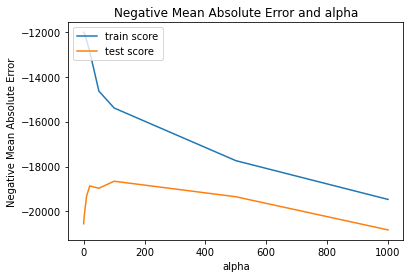

In [45]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [46]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [47]:
lasso.coef_

array([-6.43221160e+03, -2.54721084e+03,  5.10551248e+03,  1.56712823e+04,
        5.83805401e+03,  1.44683306e+03,  3.25129763e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.91958051e+02,  3.74120159e+03,
       -8.33854992e+02,  2.72692749e+04,  4.81059499e+03, -2.94678670e+02,
        2.97959612e+03,  1.75466835e+03, -0.00000000e+00, -2.74923129e+03,
        1.63023179e+03, -2.32129163e+03,  1.00719312e+04,  2.08983154e+03,
       -1.46562452e+02,  3.47328421e+02,  1.31364416e+03,  1.67555385e+03,
        5.43844847e+02, -6.81936606e+02,  2.03370738e+02, -3.29332229e+02,
       -4.65408286e+03,  1.21739535e+03,  0.00000000e+00,  2.58432521e+03,
       -3.85793168e+03,  9.94389748e+03,  2.83680588e+03, -2.24798371e+04,
       -1.35082463e+03,  1.20195100e+04,  1.63119931e+03,  1.02723586e+04,
       -0.00000000e+00,  7.92151364e+03, -4.29813916e+03, -0.00000000e+00,
       -0.00000000e+00,  1.66601740e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [48]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


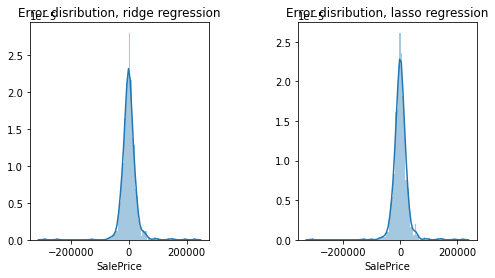

In [49]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [50]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8899108371395765
r2_score for lasso: 0.8977171424533265


In [51]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


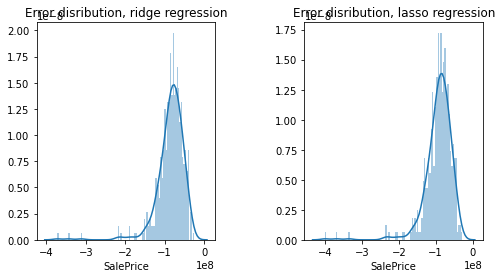

In [52]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [53]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: -1344953.92
r2_score for lasso: -1586749.77


In [54]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 152098.04),
 ('MSSubClass', -6432.212),
 ('LotFrontage', -2547.211),
 ('LotArea', 5105.512),
 ('OverallQual', 15671.282),
 ('OverallCond', 5838.054),
 ('YearRemodAdd', 1446.833),
 ('MasVnrArea', 3251.298),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -291.958),
 ('2ndFlrSF', 3741.202),
 ('LowQualFinSF', -833.855),
 ('GrLivArea', 27269.275),
 ('BsmtFullBath', 4810.595),
 ('BsmtHalfBath', -294.679),
 ('FullBath', 2979.596),
 ('HalfBath', 1754.668),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -2749.231),
 ('Fireplaces', 1630.232),
 ('GarageYrBlt', -2321.292),
 ('GarageCars', 10071.931),
 ('WoodDeckSF', 2089.832),
 ('OpenPorchSF', -146.562),
 ('EnclosedPorch', 347.328),
 ('3SsnPorch', 1313.644),
 ('ScreenPorch', 1675.554),
 ('PoolArea', 543.845),
 ('MiscVal', -681.937),
 ('MoSold', 203.371),
 ('YrSold', -329.332),
 ('Age', -4654.083),
 ('MSZoning_FV', 1217.395),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 2584.325),
 ('MSZoning_RM', -3857.932

In [55]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 152098.04),
 ('MSSubClass', -6432.212),
 ('LotFrontage', -2547.211),
 ('LotArea', 5105.512),
 ('OverallQual', 15671.282),
 ('OverallCond', 5838.054),
 ('YearRemodAdd', 1446.833),
 ('MasVnrArea', 3251.298),
 ('TotalBsmtSF', -291.958),
 ('2ndFlrSF', 3741.202),
 ('LowQualFinSF', -833.855),
 ('GrLivArea', 27269.275),
 ('BsmtFullBath', 4810.595),
 ('BsmtHalfBath', -294.679),
 ('FullBath', 2979.596),
 ('HalfBath', 1754.668),
 ('KitchenAbvGr', -2749.231),
 ('Fireplaces', 1630.232),
 ('GarageYrBlt', -2321.292),
 ('GarageCars', 10071.931),
 ('WoodDeckSF', 2089.832),
 ('OpenPorchSF', -146.562),
 ('EnclosedPorch', 347.328),
 ('3SsnPorch', 1313.644),
 ('ScreenPorch', 1675.554),
 ('PoolArea', 543.845),
 ('MiscVal', -681.937),
 ('MoSold', 203.371),
 ('YrSold', -329.332),
 ('Age', -4654.083),
 ('MSZoning_FV', 1217.395),
 ('MSZoning_RL', 2584.325),
 ('MSZoning_RM', -3857.932),
 ('Street_Pave', 9943.897),
 ('LotShape_IR2', 2836.806),
 ('LotShape_IR3', -22479.837),
 ('LotShape_Reg', -1350.

In [56]:
len(var_coeff)

117

In [57]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(df_dropped):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Age']
65


In [58]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SaleType', 'SaleCondition']
44


In [59]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'OpenPorchSF', 'MiscVal', 'YrSold', 'SaleType']
36


### Final Verdict


    Optimum value for lambda in ridge regression is 10
    Optimum value for lambda in lasso regression is 100
    So, the company can purchase houses below the market value by highlighting the negative parameters.
    Afterwards, the company can work little bit on the negative parameters to decrease the magnitude of negative weight and sell the houses by mainly highlighting the positive features.
    r2_score in train dataset: r2_score for ridge: 0.89, r2_score for lasso: 0.9
    r2_score in test dataset: r2_score for ridge: 0.87, r2_score for lasso: 0.87


